# Julia nivel intermedio

Hemos visto varias cosas:

- asignación de variables, incluyendo diversos tipos numéricos(`Int64`, `Float64`, `BigFloat`, `Complex{Float64}`, `Rational{Int64}`, etc), cadenas, vectores, matrices

- ciclos (`for`...`end`; `while`...`end`) y rangos (`a:b`)

- diversas formas de condicionales

- funciones simples

Aquí seguiremos con esto, introduciendo ahora el concepto de funciones paramétricas, la forma de definir tipos arbitrarios y cómo escribir código que escribe o modifica código.

## Ejemplo: el método de Newton

Como bien sabemos, el método de Newton es un método iterativo para encontrar los ceros, o raíces, de una ecuación $f(x)=0$. A partir de una aproximación $x_0$, y denotando la derivada de $f(x)$ como $f'(x)$, tenemos:

\begin{equation}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} .
\end{equation}



Para ejemplificar las cosas usaremos la función $f(x) = x^2-2$:

In [1]:
f(x) = x^2 - 2.0

f (generic function with 1 method)

... y su derivada:

In [2]:
f´(x) = 2*x

f´ (generic function with 1 method)

Entonces, el método de Newton vendría dado por el siguiente código:

In [3]:
x_0 = 3.0

for i in 1:10  # Consideramos 10 iteraciones del método
    x_new = x_0 - f(x_0) / f´(x_0)
    println(i, "\t", x_new)
    x_0 = x_new
end

1	1.8333333333333333
2	1.4621212121212122
3	1.4149984298948028
4	1.4142137800471977
5	1.4142135623731118
6	1.414213562373095
7	1.4142135623730951
8	1.414213562373095
9	1.4142135623730951
10	1.414213562373095


In [4]:
sqrt(2.0)

1.4142135623730951

Recordando la clase de cálculo I, el método de Newton converge si $x_0$ es *suficientemente* cercano a la raíz. Veamos qué pasa si *variamos* la condición inicial $x_0$.

In [5]:
initial_guess = -3:0.125:3

-3.0:0.125:3.0

In [6]:
typeof(initial_guess)

FloatRange{Float64}

In [7]:
collect(initial_guess)   # use tab-completion <TAB> for long variable names!

49-element Array{Float64,1}:
 -3.0  
 -2.875
 -2.75 
 -2.625
 -2.5  
 -2.375
 -2.25 
 -2.125
 -2.0  
 -1.875
 -1.75 
 -1.625
 -1.5  
  ⋮    
  1.625
  1.75 
  1.875
  2.0  
  2.125
  2.25 
  2.375
  2.5  
  2.625
  2.75 
  2.875
  3.0  

Defino el arreglo de salida que, entrada por entrada, corresponderá a las condiciones iniciales definidas en `initial_conditions`.

In [8]:
roots = similar(initial_guess)  # `similar` copy la estructura de `initial_guess` (tipo y 
                                # tamaño en `roots`

49-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

El número de datos de `initial_guess` es precisamente 49:

In [9]:
length(initial_guess)

49

Ahora, implementamos todo junto; abajo, `enumerate(initial_conditions)` regresa una *tupla* con un enetero, que es el índice de la condición inicial (`j`), y su valor (`x_0`)

In [10]:
for (j, x_0) in enumerate(initial_guess)
    x = x_0

    # 100 iterates of Newton's method
    for i in 1:100
        x = x - f(x) / f´(x)
    end
    
    roots[j] = x
end

Veamos los resultados:

In [11]:
showall(roots)

[-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.414213562373095,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,NaN,1.4142135623730951,1.414213562373095,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.414213562373095,1.4142135623730951,1.414213562373095,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.414213562373095,1.414213562373095,1.414213562373095,1.4142135623730951,1.4142135623730951,1.414213562373095,1.4142135623730951,1.4142135623730951,1.414213562373095]

**Pregunta:** ¿Por qué hay un `NaN` entre las raíces obtenidas?

In [12]:
roots[25]

NaN

Ahora vamos a visualizar esto. Para eso usaremos el paquete "PyPlot", que es una interface para usar "matplotlb".

Para instalarlo es necesario usar el siguiente comando:
```julia
    Pkg.add("PyPlot")
```

Otros paquetes *registrados* se pueden encontrar [aquí](http://pkg.julialang.org/); la lista empieza a ser larga!

Para empezar a usar un paquete ya instalado, en este caso "PyPlot", usamos el comando:

```julia
    using PyPlot
```

(Puede tardar un poco la primera vez que se utiliza.)

In [13]:
using PyPlot

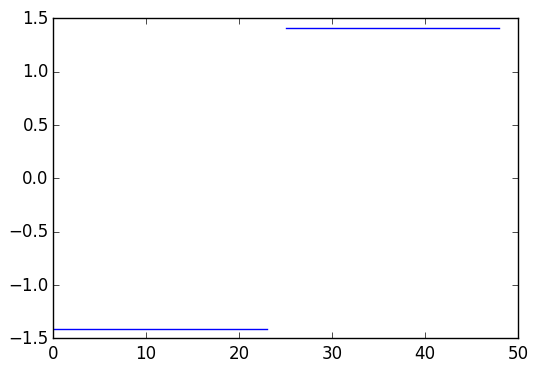

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x317a5a110>

In [14]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura

plot(roots)           # este comando pinta las componentes "y" (`roots`); 
                      # en "x" se utiliza el índice del vector

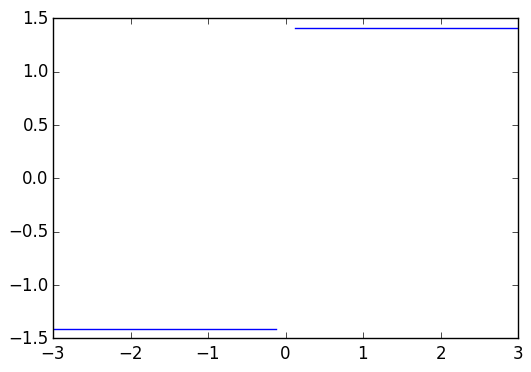

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x317ec1550>

In [15]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura

plot(initial_guess, roots)    # este comando pinta las componentes "y" (`roots`); 
                              # en "x" se utiliza `initial_guess`

## Rendimiento

La manera en que procedimos arriba **no** es la óptima para trabajar en Julia. Es **mucho** mejor poner código que será utilizado de manera repetida dentro de una función.

Entonces, lo anterior, lo empacamos dentro de una función.

In [16]:
"""
    compute_roots()

This function computes the roots of `f(x)` (which must be defined before) 
for different initial iterates in the range [-20,20], and returns them 
packed in a vector.
"""
function compute_roots()
    initial_conditions = -20:0.125:20
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 1 method)

Noten la salida de la definición de la función `compute_roots`:

```
    compute_roots (generic function with 1 method)
```

A esto volveremos más adelante...

In [17]:
?compute_roots

search: compute_roots



```
compute_roots()
```

This function computes the roots of `f(x)` (which must be defined before)  for different initial iterates in the range [-20,20], and returns them  packed in a vector.


**Ejercicio 1:** ¿Cuál es el tipo de `initial_conditions` y cual es el de `roots`?

In [18]:
# ";" suprime la salida (el vector es demasiado largo)
roots = compute_roots();

¿Cuánto tiempo tardó esto?

El *macro* `@time` (que usamos la clase pasada) permite precisamente medir el tiempo de ejecución.

Julia *compila* cada función la primera vez que es utilizada. Es por eso que conviene compilar `@time`, y luego la ejecución de `@time` con la función que nos interesa medir. Así, para medir de manera consistente el tiempo de ejecución (modulo pequeñas fluctuaciones), es importante no incluir en esa medición la compilación de la función.

In [19]:
@time 1;

  0.000005 seconds (148 allocations: 10.151 KB)


In [20]:
@time 1;

  0.000001 seconds (4 allocations: 160 bytes)


Las dos ejecuciones anteriores muestran que, al compilar (primer ejecución), julia utiliza espacio de memoria; una vez compiladas las cosas, el uso de memoria disminuye de manera importante. Incidentalmente, el uso exagerado de memoria muestra que las cosas pueden ser hechas de mejor manera...

In [21]:
@time compute_roots();

  0.000285 seconds (6 allocations: 2.766 KB)


In [22]:
@time compute_roots();  # como `compute_roots` ya está compilada, no hay mucho cambio en el
                        # tiempo de ejecución o memoria usada

  0.000296 seconds (6 allocations: 2.766 KB)


321-element Array{Float64,1}:
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
  ⋮      
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421

## Funciones genéricas

Lo que hemos hecho hasta ahora está bien, pero *no* es muy genérico, en el sentido de que no es muy cómodo la implementación si queremos considerar distintas funciones `f(x)`.

Para esto, *definimos* el siguiente *método* para la función `compute_roots`; noten que es el mismo nombre de la función que definimos antes.

In [23]:
function compute_roots(f, f´)
    initial_conditions = -20:0.125:20
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 2 methods)

Es importante notar que, ahora, tenemos 2 métodos definidos para la *misma* función `compute_roots`. Esto es, **no** hemos sobreescrito la función `compute_roots`, sino que hemos creado un nuevo método. 

Los métodos se distinguen por el tipo de argumentos de la función: en un caso *no* hay ningún argumento, mientras que en el otro hay dos argumentos.

La instrucción `methods` ayuda a saber cuántos métodos hay asociados a una función, incluyendo información sobre el tipo de los parámetros; esto último es la "signatura de tipo" (*type signature*).

In [24]:
methods(compute_roots)

# 2 methods for generic function "compute_roots":
compute_roots() at In[16]:9
compute_roots(f, f´) at In[23]:2

**Ejercicio 2:** ¿De qué tipo son las variables f y f´?

Ejecutamos ahora la nueva implementación de las funciones:

In [25]:
@time compute_roots(f, f´);

  0.019481 seconds (137.68 k allocations: 2.352 MB)


In [26]:
@time compute_roots(f, f´);

  0.003647 seconds (129.05 k allocations: 1.972 MB)


Vale la pena notar que, la vieja implementación es más rápida que la nueva, incluyendo un mejor uso de la memoria. Esto se debe a que Julia v0.4 *no* sabe cómo inferir el resultado de $f$ y $f'$, cuando son pasadas como argumento de una función; esto cambia y se vuelve más eficiente en Julia v0.5. 

Como vimos anteriormente, la manera de notar que `compute_roots(f,f´)` va a dar problemas se obtiene usando el macro `@code_warntype`. 

En las siguientes dos ejecuciones, vale la pena *notar* en el apartado de variables que la variable `x` en un caso es un `Float64` y en el otro es `Any`, respectivamente para `compute_roots()` y `compute_roots(f,f´)`; obtener `Any` es *mala señal*:

In [27]:
@code_warntype(compute_roots())

Variables:
  initial_conditions::FloatRange{Float64}
  roots::Array{Float64,1}
  #s52::Tuple{Int64,Int64}
  j::Int64
  x_0::Float64
  #s51::Int64
  x::Float64
  #s50::Int64
  i::Int64
  ######xs#7516#7524#8464::Tuple{Float64,Int64}
  ########xs#7515#7517#7525#8465::Tuple{Int64}
  ######xs#7518#7526#8466::Tuple{Float64,Int64}
  ########xs#7515#7519#7527#8467::Tuple{Int64}
  ######xs#7520#7528#8468::Tuple{Float64,Int64}
  ########xs#7515#7521#7529#8469::Tuple{Int64}
  ##n#8470::Tuple{Float64,Int64}

Body:
  begin  # In[16], line 9:
      initial_conditions = (Base.colon)((Base.box)(Float64,(Base.sitofp)(Float64,-20)),0.125,(Base.box)(Float64,(Base.sitofp)(Float64,20)))::FloatRange{Float64} # In[16], line 10:
      roots = (top(ccall))(:jl_new_array,(top(apply_type))(Base.Array,Float64,1)::Type{Array{Float64,1}},(top(svec))(Base.Any,Base.Any)::SimpleVector,Array{Float64,1},0,(top(tuple))((Base.box)(Int64,(Base.checked_fptosi)(Int64,(top(getfield))(initial_conditions::FloatRange{Float64},:

In [28]:
@code_warntype(compute_roots(f, f´))

Variables:
  f::F
  f´::F
  initial_conditions::FloatRange{Float64}
  roots::Array{Float64,1}
  #s52::Tuple{Int64,Int64}
  j::Int64
  x_0::Float64
  #s51::Int64
  x::ANY
  #s50::Int64
  i::Int64
  ######xs#7516#7524#8565::Tuple{Float64,Int64}
  ########xs#7515#7517#7525#8566::Tuple{Int64}
  ######xs#7518#7526#8567::Tuple{Float64,Int64}
  ########xs#7515#7519#7527#8568::Tuple{Int64}
  ######xs#7520#7528#8569::Tuple{Float64,Int64}
  ########xs#7515#7521#7529#8570::Tuple{Int64}
  ##n#8571::Tuple{Float64,Int64}

Body:
  begin  # In[23], line 2:
      initial_conditions = (Base.colon)((Base.box)(Float64,(Base.sitofp)(Float64,-20)),0.125,(Base.box)(Float64,(Base.sitofp)(Float64,20)))::FloatRange{Float64} # In[23], line 3:
      roots = (top(ccall))(:jl_new_array,(top(apply_type))(Base.Array,Float64,1)::Type{Array{Float64,1}},(top(svec))(Base.Any,Base.Any)::SimpleVector,Array{Float64,1},0,(top(tuple))((Base.box)(Int64,(Base.checked_fptosi)(Int64,(top(getfield))(initial_conditions::FloatRange{

Otra manera de hacer esto mismo, pero usando funciones anónimas es la siguiente:

In [29]:
@time compute_roots(x->x^2-2, x->2x);

  0.013701 seconds (161.23 k allocations: 2.467 MB)


In [30]:
@time compute_roots(x->x^2-2, x->2x);

  0.009668 seconds (161.19 k allocations: 2.464 MB)


En este momento (versión 0.4 de Julia), las funciones anónimas son aún lentas, pero se pueden hacer trucos para que funcionen mejor. Esto tiene que ver con el hecho de que Julia no sabe el tipo de resultado de las funciones anónimas, en el momento de compilar la función.

Hagamos otro ejemplo un poco más interesante:

In [31]:
@time roots = compute_roots( x -> (x-1)*(x-2)*(x-3), x->(x-2)*(x-3)+(x-1)*(x-3)+(x-1)*(x-2) );

  0.042470 seconds (516.12 k allocations: 7.942 MB, 12.03% gc time)


In [32]:
@time roots = compute_roots( x -> (x-1)*(x-2)*(x-3), x->(x-2)*(x-3)+(x-1)*(x-3)+(x-1)*(x-2) );

  0.034398 seconds (514.31 k allocations: 7.854 MB)


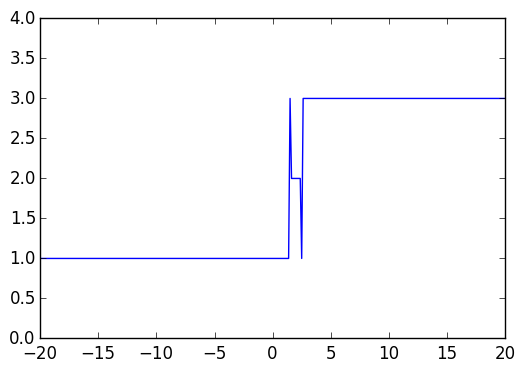

(0,4)

In [33]:
figure(figsize=(6,4))
plot(-20:0.125:20, roots)
ylim(0,4)

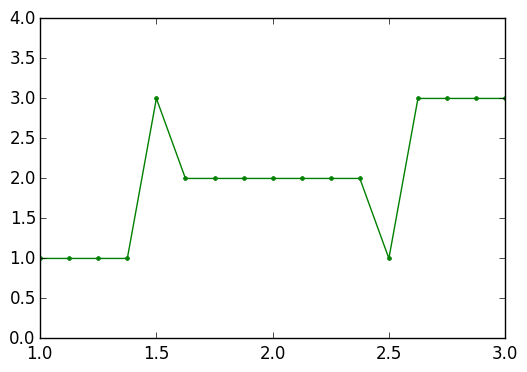

(1,3)

In [34]:
figure(figsize=(6,4))
plot(-20:0.125:20, roots, "g.-")
ylim(0,4)
xlim(1,3)

**Ejercicio 3:** Modificar y documentar (!) la función `compute_roots` de tal manera que la condición inicial sea un rango arbitrario que el usuario da a la entrada.

Usando esta función, ¿cómo se ve las raíces a las que converge la iteración del método de Newton para $f(x) = (x-1)(x-2)(x-3)$? En este caso vale la pena concentrarse en valores $x_0\in [1,3]$, usar muchos puntos y quizás hacer observar localmente la estructura.

In [35]:
"""

"""

function compute_roots_y()
    initial_conditions = 1:0.125:3
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots_y (generic function with 1 method)

## El método de Newton sobre los complejos

Ahora, implementaremos el método de Newton, para alguna función modelo ($f(z) = z^3-1$), pero usaremos condiciones iniciales en los complejos.

Las condiciones iniciales, igual que antes, las definiremos a partir de un `FloatRange{Float64}`, que usaremos tanto para la parte real como para la parte imaginaria de $z_0$.

A priori podríamos proceder como antes. Sin embargo, hay *sutilezas*, ya que la salida `roots` no será un vector, sino una matriz.

In [ ]:
const cc = complex(1.0,0.0)

f(z) = z^3 - cc
f´(z) = 3*z^2

**NOTA**: La siguiente función necesita las funciones $f$ y $f'$, lo que permite usarlas en contextos más generales. Esto, como vimos antes, tiene una penalización en la ejecución.

In [ ]:
function compute_complex_roots(f, f´, range=-5.0:0.125:5.0)  # default value

    L = length(range)
    
    ## Se define la matriz con todos los elementos inicialmente en cero
    roots = zeros(Complex128, L, L)  # set a matrix of appropriate length to zero

    for (j, x) in enumerate(range)
        for (i, y) in enumerate(range)
            
            z = x + y*im
            
            for k in 1:1000
                z = z - f(z) / f´(z)
            end
            
            roots[i,j] = z
            
        end
    end
    
    roots
end

In [ ]:
@time compute_complex_roots(f, f´, -5.0:1.0:5.0);

In [ ]:
@time croots = compute_complex_roots(f, f´, -5.0:1/32:5.0);

**Ejercicio 4:** Encuentren la implementación más rápida de `compute_complex_roots` considerando las dos opciones relacionadas con el ´rden en que aparecen los índices (i,j)en el doble ciclo.

¿Por qué `compute_complex_roots` tiene 2 métodos definidos?

Visualicemos los resultados: para esto usaremos `imshow`, que sirve para visualizar una matriz, y el código de colores lo definiremos a partir de la parte imaginaria de `roots`.

In [ ]:
imshow(imag(croots))

**NOTA** La librería `PyPlot` está basada en `matplotlib`; en la red hay muchos recursos para usar `matplotlib` y generar diversos tipos de gráficas.

## Definición de nuevos tipos

Ahora veremos cómo crear nuevos tipos. Esto es algo impresionantemente útil, ya que permite definir un arreglo compacto de datos de interés. Dado que Julia se basa en el tipo, esto se traduce en velocidad.

A manera ilustrativa definiremos un nuevo tipo, que llamaremos `AuDiff`.

### Los campos de un `type`

Para entender un poco más lo que significa definir un nuevo tipo, consideremos los números complejos:

In [ ]:
z0 = complex(3,2) # Esto es *mejor* que z=3+2im

In [ ]:
typeof(ans)

La instrucción `fieldnames` da los campos internos de un tipo; vale la pena notar que el resultado consiste en un vector de *símbolos*. Estos símbolos son los nombres de los campos internos del tipo.

In [ ]:
fieldnames(z0)

In [ ]:
z0.re, z0.im

In [ ]:
typeof(ans)

### Definición del tipo `AuDiff`

La sintáxis básica para definir nuevos tipos es:

In [ ]:
type AuDiff
    fun :: Float64
    der :: Float64
end

En la celda anterior, el doble dos-puntos `::` sirve para *anotar* el tipo de las variables internas. Esto es, `AuDiff` constará de dos componentes, `fun` y `der`, ambas del tipo `Float64`.

Por **convención**, las estructuras de tipo empiezan con una *mayúscula*; las funciones empiezan en *minúsculas*.

Veamos cuántos métodos hemos definido en torno a `AuDiff`:

In [ ]:
methods(AuDiff)

Usando el resultado de `methods`, probamos con la función `call`:

In [ ]:
call(AuDiff, 1.0, 2.0)

In [ ]:
call(AuDiff, 1, 2)

In [ ]:
call(AuDiff, (1, 2)...) # "..." es el 'splat' operator

Los puntos suspensivos `...` implican que la *tupla* (1,2) será separada en sus componentes individuales, cada una considerada como un parámetro independiente.

**NOTA:** La función `call` de hecho es la forma genérica de crear cualquier tipo en Julia v0.4, pero se tornará obsoleta, por lo que no la usaremos. En cambio, usaremos la forma más explícita:

In [ ]:
x = AuDiff(1, 4)

In [ ]:
y = AuDiff(5, 6)

In [ ]:
fieldnames(AuDiff)

In [ ]:
x.fun

Vale la pena notar que uno puede modificar los campos internos de un tipo:

In [ ]:
x.fun = 3

In [ ]:
x

**NOTA:** Uno también puede definir estructuras en que **no** sea posible modificar los valores internos; un ejemplo es `Rational`.

Sin importar mucho el significado de cada componente, la pregunta es si podemos sumar dos de ellos. Problemos:

In [ ]:
x + y

Julia nos arroja un error ya que *no* está definida la función `+` para los argumentos de tipo `AuDiff`; el mensaje de la primer línea es perfectamente claro.

Entonces, dado que *no* está definido, y nos interesa usarlo, podemos simplemente definirlo. Por ejemplo, usando la siguiente definición:

In [ ]:
+(a::AuDiff, b::AuDiff) = AuDiff(a.fun+b.fun, a.der+b.der)

In [ ]:
x + y

De igual manera procedemos con las demás operaciones. Para evitar el mensaje, importaremos primero las funciones desde `Base` y luego las definiremos.

In [ ]:
import Base.-
-(a::AuDiff, b::AuDiff) = AuDiff(a.fun-b.fun, a.der-b.der)

In [ ]:
import Base: *, /, ^

*(a::AuDiff, b::AuDiff) = AuDiff(a.fun*b.fun, a.fun*b.der+a.der*b.fun)

function /(a::AuDiff, b::AuDiff)
    nn = a.fun/b.fun
    dd = (a.der - nn*b.der)/b.fun
    return AuDiff(nn, dd)
end

^(a::AuDiff, n::Int) = AuDiff(a.fun^n, n * a.der * a.fun^(n-1))

Veamos algunos ejemplos:

In [ ]:
x + y

In [ ]:
x - y

In [ ]:
x * y

In [ ]:
x / y

### Tipos parametrizados

El tipo `AuDiff` que definimos arriba funciona, pero es rígido en el sentido de que sus campos son *siempre* `Float64`. Por ejemplo:

In [ ]:
AuDiff(1//2, 1//1) + AuDiff(1//3, 1//1)

In [ ]:
AuDiff(complex(1,2), complex(1,1))

Hay situaciones en que nos interesa tener un tipo y que éste funcione para distintos tipos de signatura de los parámetros internos, por ejemplo, con `Complex` o `Rational` u otras cosas del estilo. Por ejemplo, cosas tipo:

In [ ]:
typeof(complex(1.0,2.0))

In [ ]:
typeof(complex(1,2))

In [ ]:
typeof( [1, 2.1] )

Noten arriba que el entero "1" es *promovido* a Float64 "1.0", que es el tipo del segundo elemento.

Trataremos de hacer esto; sin embargo, Julia **no** permite redefinir las estructuras. Por esto, borraremos **todos** los nombres que tenemos definidos, e iniciaremos de nuevo.

In [ ]:
workspace()

In [ ]:
type AuDiff{T}
    fun :: T
    der :: T
end

En la definición de `AuDiff`, `T` representa el tipo de la estructura que creamos y *parametriza* a `AuDiff` lo que se indica con `{T}`. Dada esta definición, ambas componentes `x` y `y` tienen que ser del (mismo) tipo `T`.

In [ ]:
x = AuDiff(1,3)

y = AuDiff(2.0,3.5)

@show(x, y)

El definir una estructura parametrizada hace que, por default, si los parámetros **no** cumplen la signatura del tipo, haya un error:

In [ ]:
AuDiff(1, 2.3)

Noten que la actual definición de `AuDiff{T}` (parametrizada) es *demasiado* flexible, esto es, permite definir ciertos tipos que, quizás, no nos interesa considerar.

In [ ]:
AuDiff("Soy", "Luis")

Las funciones, de hecho, también pueden ser parametrizadas:

In [ ]:
import Base.+
+{T}(a::AuDiff{T}, b::AuDiff{T}) = AuDiff{T}(a.fun+b.fun, a.der+b.der)

Noten arriba que la función, de hecho, está parametrizada, y que el parámetro está relacionado con el parámetros del tipo de los argumentos. 



In [ ]:
AuDiff(1,3) + AuDiff(-1,2)

In [ ]:
AuDiff(1,3) + AuDiff(-1//2,2//2)

El error es claro: no hemos definido cómo sumar `AuDiff{Int64}` con `AuDiff{Rational{Int64}}`; únicamente hemos definido la suma de dos `AuDiff{Int64}` o de dos `AuDiff{Rational{Int64}}`, pero ambos deben ser del mismo tipo, incluyendo sus parametrizaciones.

Uno, de hecho, podría haber definido la misma operación sin incluir la parte paramétrica; esto tiene consecuencias interesantes, que de hecho, a veces son deseables. Así, tenemos:

In [ ]:
import Base.-
-(a::AuDiff, b::AuDiff) = AuDiff(a.fun-b.fun, a.der-b.der)

In [ ]:
AuDiff(1,3) - AuDiff(-1,2)

In [ ]:
AuDiff(1,3) - AuDiff(3.0,1.1)

In [ ]:
AuDiff(1,3) - AuDiff("Soy", "Luis")

Gracias a que *no* impusimos que `a` y `b` sean *ambos* `AuDiff{T}`, julia puede restarlos.

### Promotion and convertion

La pregunta es, cómo conseguir que *no* nos de un error la instrucción `Vector2D(1, 3.2)`. La respuesta tiene que ver con definir reglas de conversión y promoción. (En este caso concreto, como veremos abajo, una regla de promoción es suficiente.)

Convertir entre tipos (donde esto tenga sentido) se logra usando `convert`:

In [ ]:
convert(Float64, 1//2)

In [ ]:
convert(Array{Float64,1}, [1//2, 1//3])

In [ ]:
x = convert(Rational{Int128}, 0.5)

In [ ]:
typeof(x)

La operación de conversión debe tener sentido; por ejemplo, ¿qué esperamos que nos de `convert(Int64, 0.6)`?

In [ ]:
convert(Int64, 0.6)

También, existe la promoción de varios objetos a un tipo común:

In [ ]:
tup = promote(1, 1//2, BigInt(2))

In [ ]:
typeof(tup)

Como vimos, Julia define un árbol jerárquico en la organización de los tipos. Para entender esto veamos dos casos:

In [ ]:
? Int64

In [ ]:
? Rational

In [ ]:
? Signed

Esto muestra que hay ciertos tipos *concretos* (como `Int64`, `Float64`) y *otros* que son abstractos; los segundos en algún sentido agrupan varios tipos distintos.

La instrucción `super` permite ver qué tipo está directamente arriba en la estructura del árbol:

In [ ]:
super(Float64)

In [ ]:
super(AbstractFloat)

In [ ]:
super(Real)

... y la instrucción subtypes, qué está por debajo:

In [ ]:
subtypes(Real)

In [ ]:
subtypes(Number)

La estructura de árbol tiene un tope *por arriba*, `Any`:

In [ ]:
super(Number)

In [ ]:
super(Any)

In [ ]:
subtypes(Any)

Vale la pena notar que existe, entre varias cosas, el tipo `Void` (antes `Nothing`)

In [ ]:
? Void

Volviendo al punto de cómo hacer para que `Vector2D{1, 3.2}` funcione, podemos definir un nuevo *método*, para la creación del tipo `Vector2D`, que involucre una promoción de tipos, de la siguiente manera:

In [ ]:
AuDiff(a, b) = AuDiff(promote(a,b)...)

In [ ]:
methods(AuDiff)

In [ ]:
AuDiff(1, 3.2)

Obviamente, esto sólo tendrá sentido cuando la promoción tiene sentido; cuando no la tiene, arrojará un error:

In [ ]:
AuDiff("Hola", 3.2)

Por último, uno puede restringir el tipo de parámetros de una estructura, usando la notación ` T <: R` que significa que el parámetro `T` es subtipo de `R`. Un ejemplo es `T <: Real`.

In [ ]:
workspace()

In [ ]:
type AuDiff{T<:Real}
    fun :: T
    der :: T
end

Agregamos la promoción de los tipos:

In [ ]:
AuDiff(a, b) = AuDiff(promote(a,b)...)

In [ ]:
AuDiff(1, 3.2)

In [ ]:
AuDiff("Soy", "Luis")

La notación `T <: R` de hecho puede ser utilizada para saber si un tipo es subtipo de otro:

In [ ]:
Int64 <: Real

In [ ]:
Int64 <: Void

In [ ]:
Void <: Int64

Las dos últimas instrucciones muestran que `Void` e `Int64` pertenecen a dos ramas distintas del árbol jerárquico de tipos; en otras palabras, el tipo superior común entre `Int64` y `Void` es `Any`:

In [ ]:
promote_type(Int64, Void)

Finalmente, para definir que algo una estructura específica es un subtipo de algo específico, usamos `<:` nuevamente:

In [ ]:
workspace()

In [ ]:
type AuDiff{T<:Real} <: Real
    fun :: T
    der :: T
end

In [ ]:
AuDiff(a, b) = AuDiff(promote(a,b)...)

In [ ]:
import Base: +, -, *, /, ^

+(a::AuDiff, b::AuDiff) = AuDiff(a.fun+b.fun, a.der+b.der)

-(a::AuDiff, b::AuDiff) = AuDiff(a.fun-b.fun, a.der-b.der)

*(a::AuDiff, b::AuDiff) = AuDiff(a.fun*b.fun, a.fun*b.der+a.der*b.fun)

function /(a::AuDiff, b::AuDiff)
    nn = a.fun/b.fun
    dd = (a.der - nn*b.der)/b.fun
    return AuDiff(nn, dd)
end

^(a::AuDiff, n::Int) = AuDiff(a.fun^n, n * a.der * a.fun^(n-1))

**Ejercicio 5:** ¿Qué representa la estructura que definimos? ¿Qué se puede calcular? Para guiar la respuesta, consideren un polinomio sencillo, $p(x) = 7x^4 - 3x + 1$, y jugando con las operaciones definidas para `x::AuDiff{T}` aclaren qué representan los campos de `x`.
Escriban clara y detalladamente.